In [1]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=a4693d8abe4d3712ca2cb2e8ceb5b5c07a045ad9f1e05dcbc37d1c8817e06dc9
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
!pip install wittgenstein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.6/110.6 kB 2.3 MB/s eta 0:00:00


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date,timedelta
import pandas_ta as ta
from sklearn.model_selection import train_test_split
import wittgenstein as wnt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
df_bitcoin=yf.download("BTC-USD",start="2019-01-01",end=date.today(),progress=False)

In [5]:
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [6]:
df_bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-29,29319.445312,29396.843750,29264.166016,29356.917969,29356.917969,6481775959
2023-07-30,29357.093750,29443.169922,29059.501953,29275.308594,29275.308594,8678454527
2023-07-31,29278.314453,29489.873047,29131.578125,29230.111328,29230.111328,11656781982
2023-08-01,29230.873047,29675.732422,28657.023438,29675.732422,29675.732422,18272392391
2023-08-02,29704.146484,29987.998047,28946.509766,29151.958984,29151.958984,19212655598


In [7]:
df_bitcoin.shape

(1675, 6)

In [8]:
df_bitcoin.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

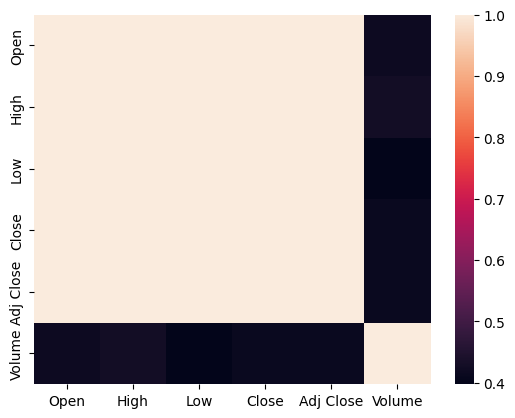

In [9]:
sns.heatmap(df_bitcoin.corr())

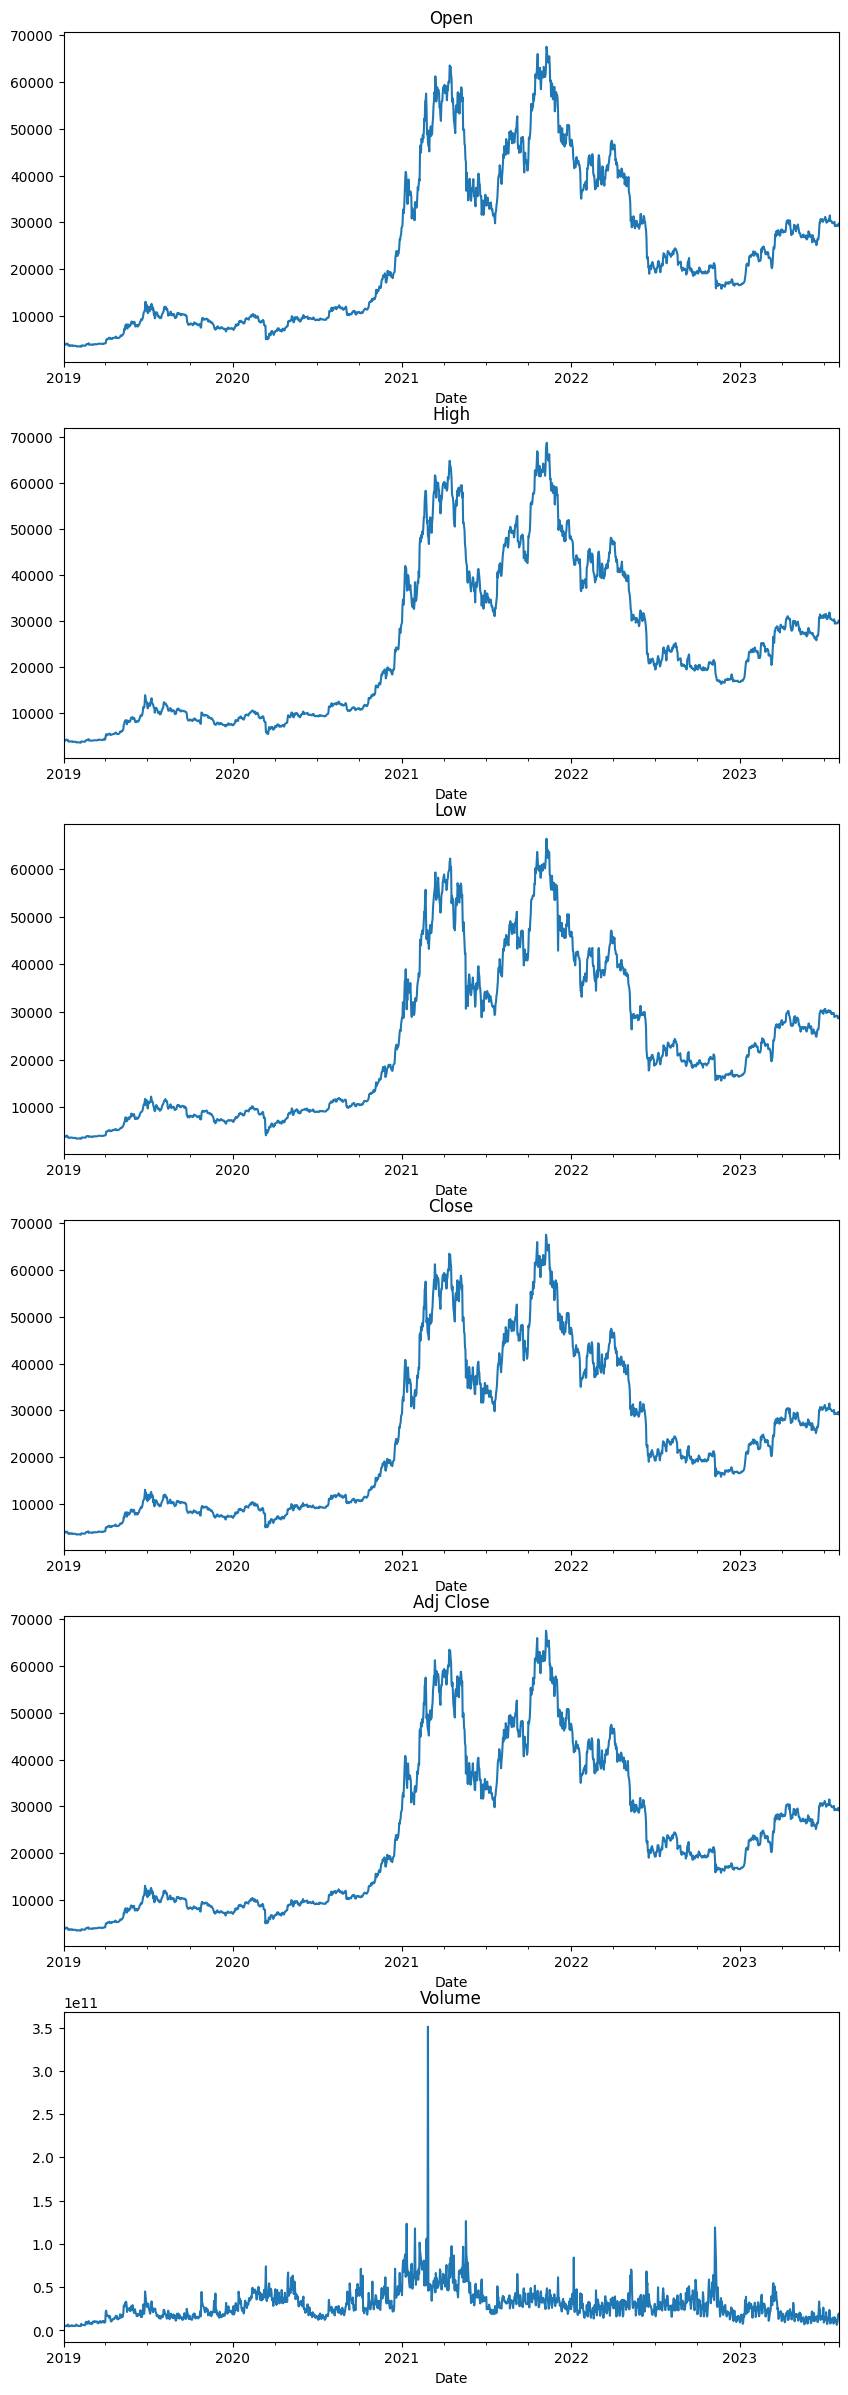

In [10]:
fig, axes = plt.subplots(nrows=len(df_bitcoin.columns), figsize=(10, 5*len(df_bitcoin.columns)))

for idx, column in enumerate(df_bitcoin.columns):
    df_bitcoin[column].plot(ax=axes[idx], title=column)

In [11]:
df_eth=yf.download("ETH-USD",start="2019-01-01",end=date.today(),progress=False)

In [12]:
df_eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928


In [13]:
df_eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1.675000e+03
mean,1368.146824,1408.231571,1323.810361,1368.951236,1368.951236,1.488317e+10
std,1207.612281,1243.461393,1166.171253,1206.791165,1206.791165,1.012187e+10
min,104.645050,106.058876,95.184303,104.535301,104.535301,2.212109e+09
25%,222.545891,228.319351,216.240677,222.697891,222.697891,7.675446e+09
50%,1274.662476,1302.038696,1242.152222,1274.871704,1274.871704,1.248410e+10
75%,1956.429077,2014.738464,1901.610779,1956.317810,1956.317810,1.892944e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


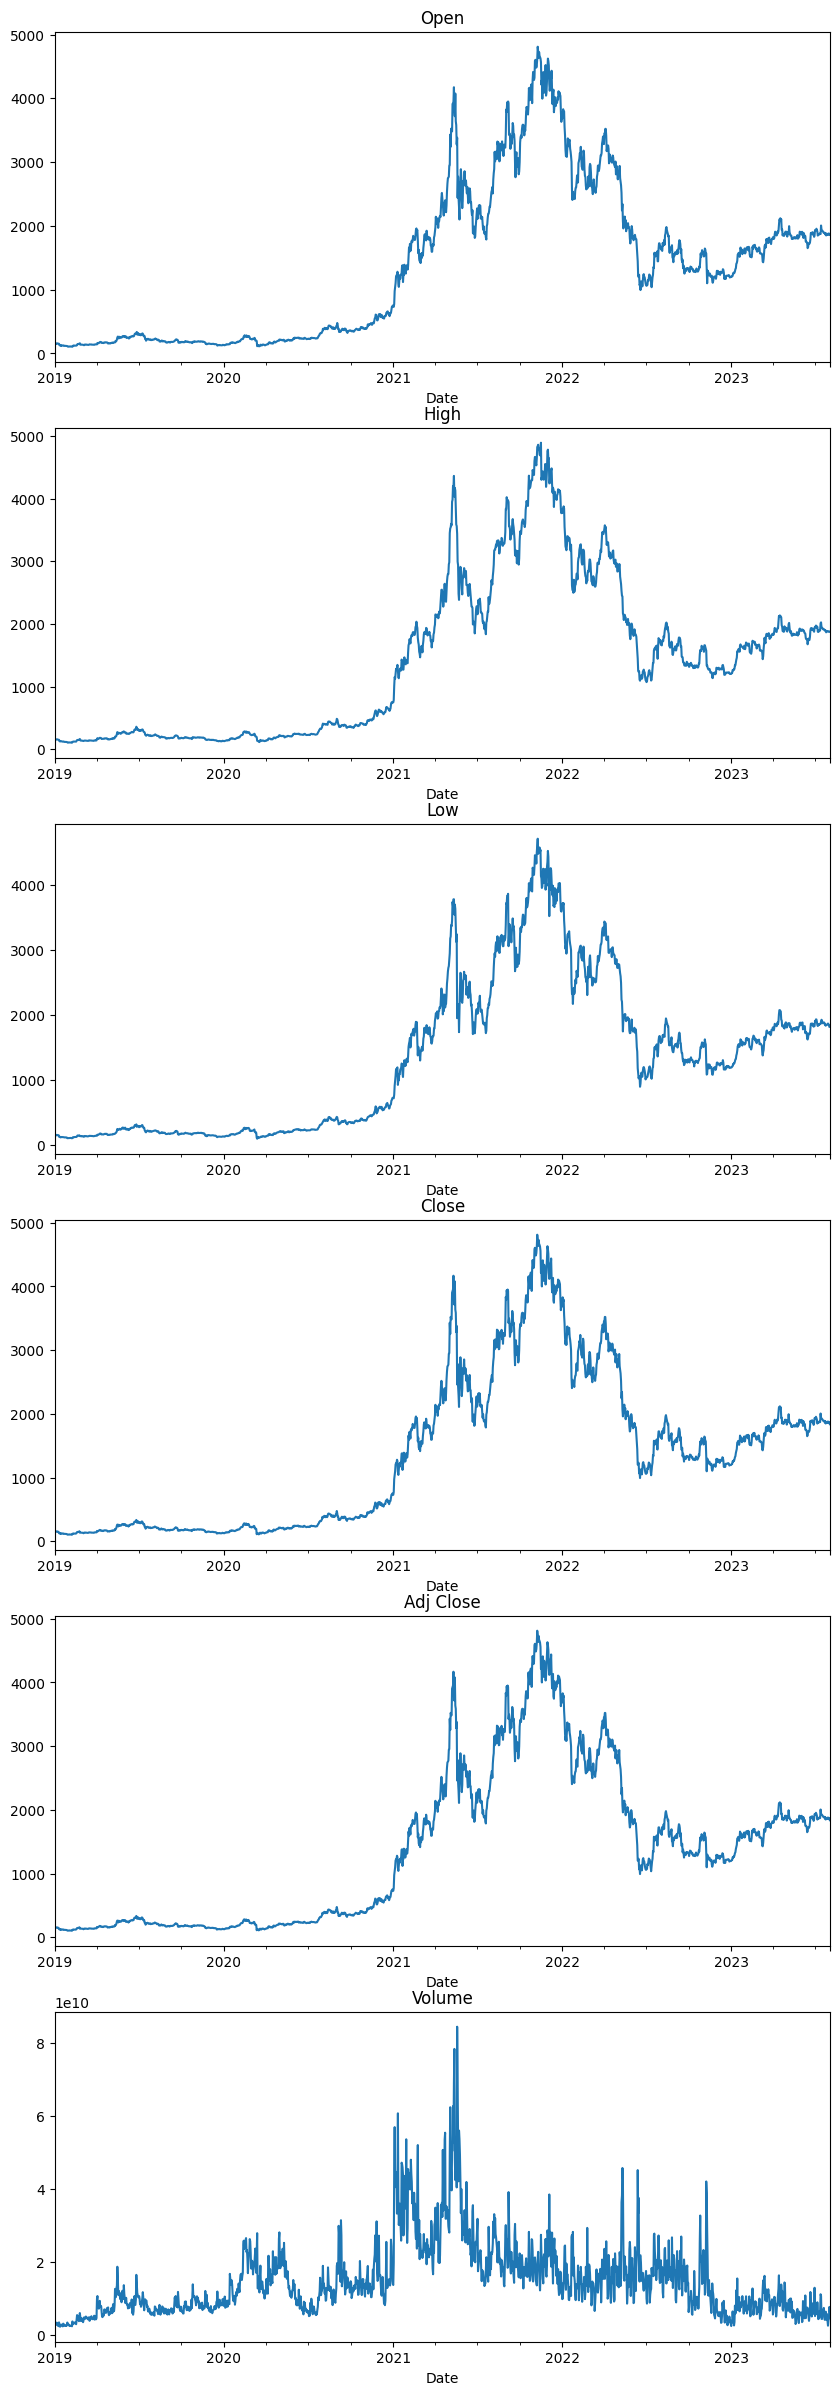

In [14]:
fig, axes = plt.subplots(nrows=len(df_eth.columns), figsize=(10, 5*len(df_eth.columns)))

for idx, column in enumerate(df_eth.columns):
    df_eth[column].plot(ax=axes[idx], title=column)

In [15]:
df_nasdaq=yf.download("^NDX",start="2019-01-01",end=date.today(),progress=False)

In [16]:
df_nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,6198.680176,6394.740234,6198.680176,6360.870117,6360.870117,2261800000
2019-01-03,6274.759766,6292.680176,6139.399902,6147.129883,6147.129883,2631550000
2019-01-04,6250.049805,6445.200195,6234.589844,6422.669922,6422.669922,2596150000
2019-01-07,6434.549805,6521.439941,6412.979980,6488.250000,6488.250000,2523450000
2019-01-08,6555.910156,6574.729980,6457.000000,6551.850098,6551.850098,2407340000


In [17]:
df_nasdaq.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [18]:
df_nasdaq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1.154000e+03
mean,11540.799197,11636.068749,11441.224883,11545.408437,11545.408437,4.182956e+09
std,2795.492413,2812.829584,2771.160011,2792.427169,2792.427169,1.467126e+09
min,6198.680176,6292.680176,6139.399902,6147.129883,6147.129883,1.014530e+09
25%,8724.097656,8845.232910,8676.814941,8761.117676,8761.117676,3.150922e+09
50%,11926.100098,12047.469727,11821.189941,11926.825195,11926.825195,4.361095e+09
75%,13707.702393,13781.939697,13614.300049,13701.982666,13701.982666,5.053395e+09
max,16644.769531,16764.859375,16523.830078,16573.339844,16573.339844,1.162119e+10


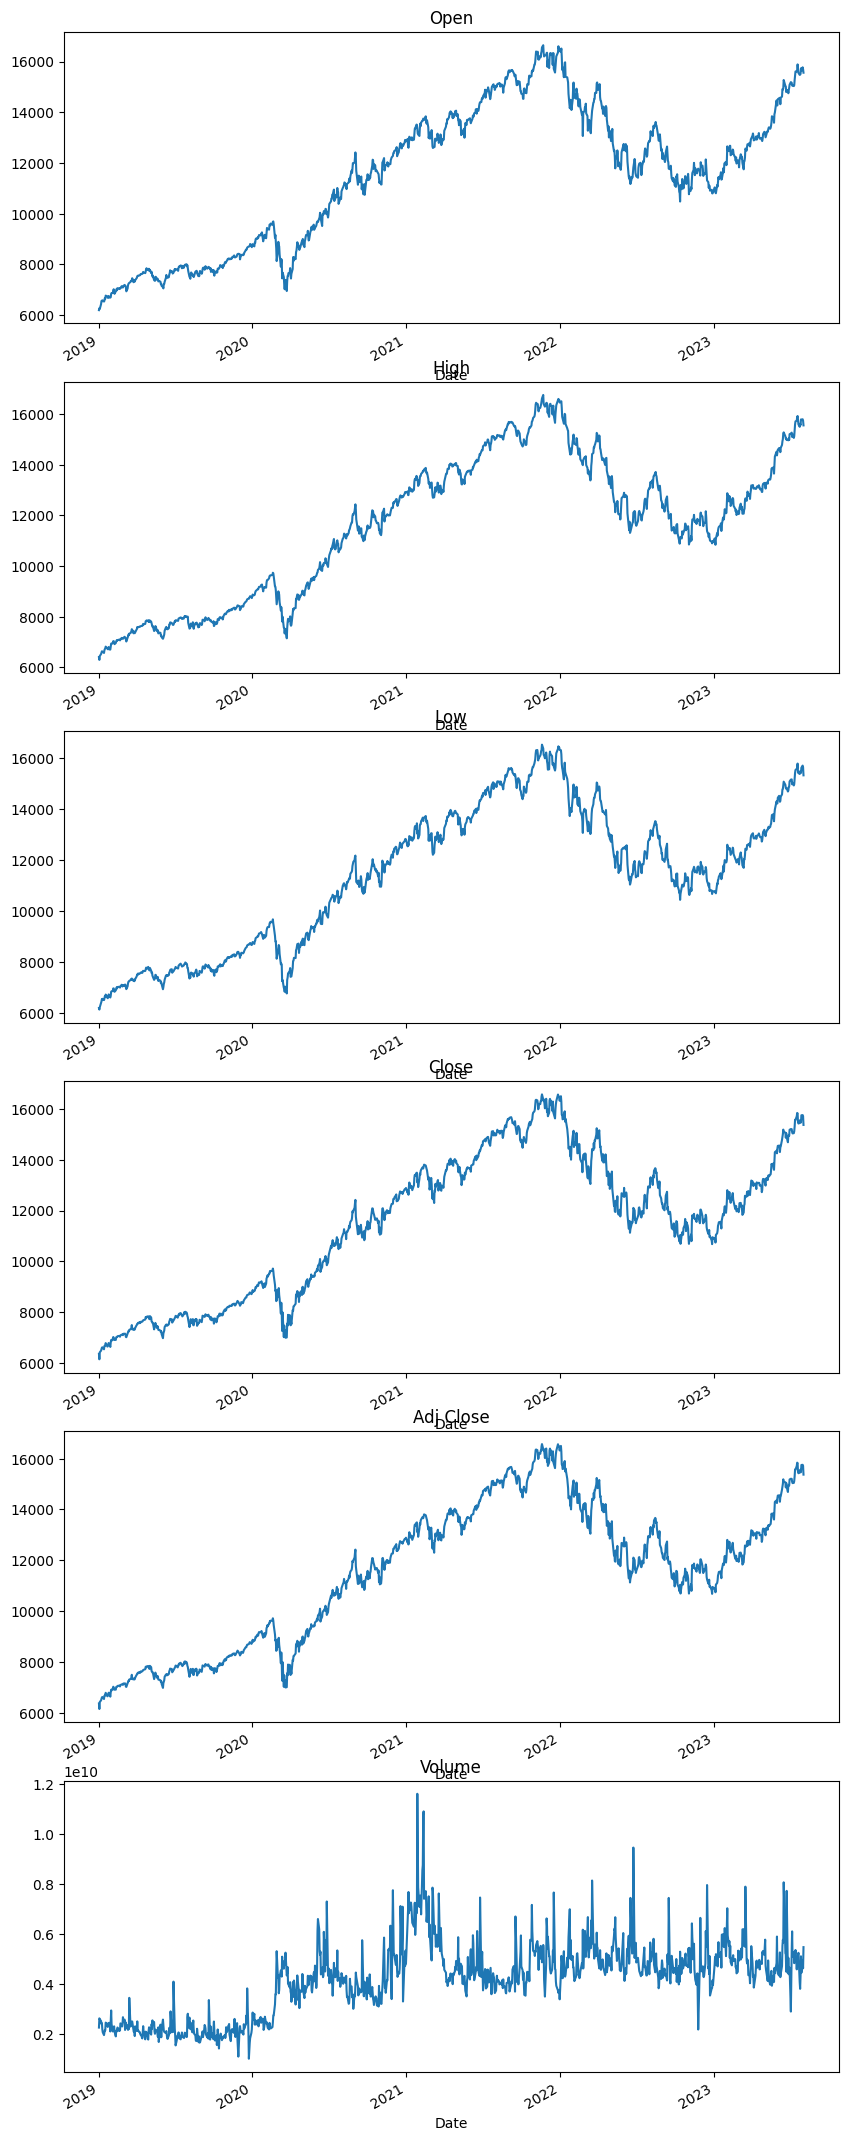

In [19]:
fig, axes = plt.subplots(nrows=len(df_nasdaq.columns), figsize=(10, 5*len(df_nasdaq.columns)))

for idx, column in enumerate(df_nasdaq.columns):
    df_nasdaq[column].plot(ax=axes[idx], title=column)

In [20]:
df_bitcoin["RSI(2)(BTC)"]=ta.rsi(close=df_bitcoin["Close"],length=2)
df_eth["RSI(2)(ETH)"]=ta.rsi(close=df_eth["Close"],length=2)
df_nasdaq["RSI(2)(NDX)"]=ta.rsi(close=df_nasdaq["Close"],length=2)

In [21]:
df_bitcoin["RSI(10)(BTC)"]=ta.rsi(close=df_bitcoin["Close"],length=10)
df_eth["RSI(10)(ETH)"]=ta.rsi(close=df_eth["Close"],length=10)
df_nasdaq["RSI(10)(NDX)"]=ta.rsi(close=df_nasdaq["Close"],length=10)

In [22]:
df_bitcoin["Close/MovingAvg(16)(BTC)"]=df_bitcoin["Close"]/ta.sma(close=df_bitcoin["Close"],length=16)
df_eth["Close/MovingAvg(16)(ETH)"]=df_eth["Close"]/ta.sma(close=df_eth["Close"],length=16)
df_nasdaq["Close/MovingAvg(16)(NDX)"]=df_nasdaq["Close"]/ta.sma(close=df_nasdaq["Close"],length=16)

In [23]:
df_bitcoin["Close/MovingAvg(35)(BTC)"]=df_bitcoin["Close"]/ta.sma(close=df_bitcoin["Close"],length=35)
df_eth["Close/MovingAvg(35)(ETH)"]=df_eth["Close"]/ta.sma(close=df_eth["Close"],length=35)
df_nasdaq["Close/MovingAvg(35)(NDX)"]=df_nasdaq["Close"]/ta.sma(close=df_nasdaq["Close"],length=35)

In [24]:
df_bitcoin["Williams %R(10)(BTC)"] = ta.willr(high=df_bitcoin["High"], low=df_bitcoin["Low"], close=df_bitcoin["Close"], lbp=10)
df_eth["Williams %R(10)(ETH)"] = ta.willr(high=df_eth["High"], low=df_eth["Low"], close=df_eth["Close"], lbp=10)
df_nasdaq["Williams %R(10)(NDX)"] = ta.willr(high=df_nasdaq["High"], low=df_nasdaq["Low"], close=df_nasdaq["Close"], lbp=10)

In [25]:
df_bitcoin=df_bitcoin.dropna()

In [26]:
df_bitcoin.isnull().sum()

Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
RSI(2)(BTC)                 0
RSI(10)(BTC)                0
Close/MovingAvg(16)(BTC)    0
Close/MovingAvg(35)(BTC)    0
Williams %R(10)(BTC)        0
dtype: int64

In [27]:
df_eth=df_eth.dropna()

In [28]:
df_nasdaq=df_nasdaq.dropna()

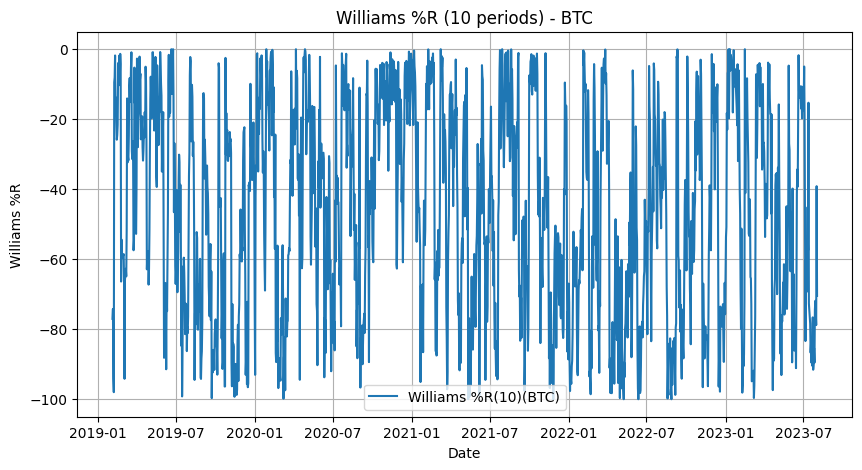

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df_bitcoin["Williams %R(10)(BTC)"], label="Williams %R(10)(BTC)")
plt.title("Williams %R (10 periods) - BTC")
plt.xlabel("Date")
plt.ylabel("Williams %R")
plt.legend()
plt.grid()
plt.show()

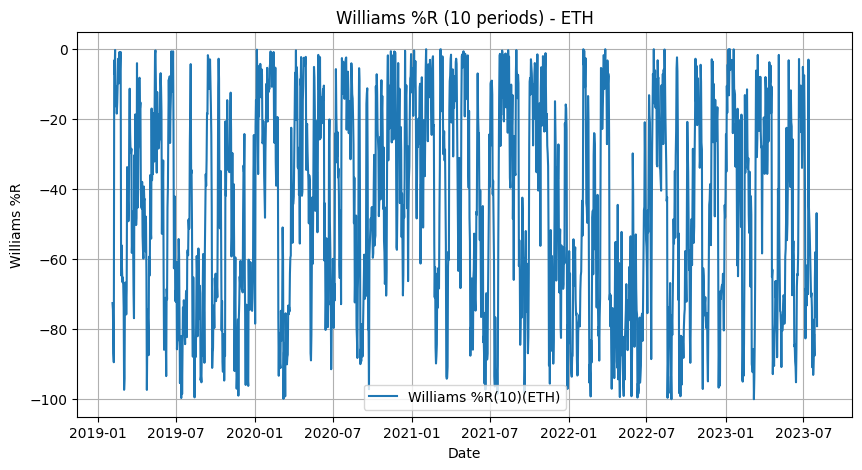

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df_eth["Williams %R(10)(ETH)"], label="Williams %R(10)(ETH)")
plt.title("Williams %R (10 periods) - ETH")
plt.xlabel("Date")
plt.ylabel("Williams %R")
plt.legend()
plt.grid()
plt.show()

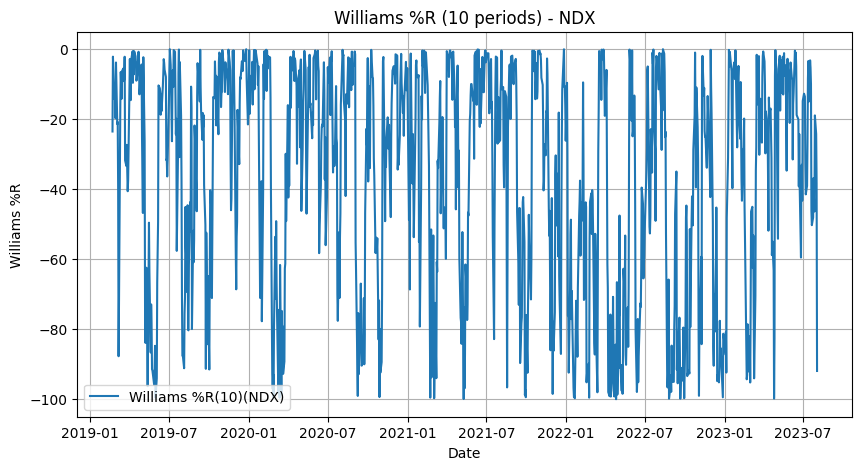

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df_nasdaq["Williams %R(10)(NDX)"], label="Williams %R(10)(NDX)")
plt.title("Williams %R (10 periods) - NDX")
plt.xlabel("Date")
plt.ylabel("Williams %R")
plt.legend()
plt.grid()
plt.show()

In [32]:
df_bitcoin["LABEL"]=np.where((df_bitcoin["Open"].shift(-2)/df_bitcoin["Open"].shift(-1)).gt(1.0025),"1","-1")

In [33]:
df_bitcoin["LABEL"]

Date
2019-02-04     1
2019-02-05    -1
2019-02-06    -1
2019-02-07     1
2019-02-08    -1
              ..
2023-07-29    -1
2023-07-30    -1
2023-07-31     1
2023-08-01    -1
2023-08-02    -1
Name: LABEL, Length: 1641, dtype: object

In [34]:
x_btc=df_bitcoin.drop(labels="LABEL",axis=1)
y_btc=df_bitcoin["LABEL"]
x_btc_train,x_btc_test,y_btc_train,y_btc_test=train_test_split(x_btc,y_btc,test_size=0.2,random_state=0)

In [39]:
ripper=wnt.RIPPER(max_rules=100)
ripper.fit(x_btc_train,y_btc_train,pos_class="1")

In [40]:
ripper.out_model()

[[Williams%R(10)(BTC)=<-88.09 ^ RSI(2)(BTC)=20.17-29.41 ^ Close/MovingAvg(35)(BTC)=0.88-0.93]]


In [42]:
df_bitcoin["Pred"]=np.append(ripper.predict(x_btc_train),ripper.predict(x_btc_test))

In [46]:
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2)(BTC),RSI(10)(BTC),Close/MovingAvg(16)(BTC),Close/MovingAvg(35)(BTC),Williams %R(10)(BTC),LABEL,Pred
Date,,,,,,,,,,,,,
2019-02-04,3467.211670,3476.223877,3442.586914,3459.154053,3459.154053,5332718886,26.653181,35.922123,0.978743,0.940861,-77.044006,1,False
2019-02-05,3454.950928,3478.148193,3451.937012,3466.357422,3466.357422,5227549545,43.128196,37.236635,0.983122,0.945592,-74.209299,-1,False
2019-02-06,3469.091797,3469.091797,3398.565430,3413.767822,3413.767822,5482196038,10.077306,31.924153,0.971000,0.935106,-94.070082,-1,False
2019-02-07,3414.929443,3427.945557,3394.218506,3399.471680,3399.471680,5004962683,7.113479,30.605289,0.970472,0.934388,-97.985086,1,False
2019-02-08,3401.376465,3695.614014,3391.023682,3666.780273,3666.780273,7735623101,92.258473,62.656610,1.045260,1.009375,-9.466400,-1,False


In [48]:
df_eth["LABEL"] = np.where((df_eth["Open"].shift(-2) / df_eth["Open"].shift(-1)).gt(1.0025), "1", "-1")

In [49]:
df_eth = df_eth.dropna()
x_eth = df_eth.drop(labels="LABEL", axis=1)
y_eth = df_eth["LABEL"]

In [52]:
df_eth["LABEL"] = np.where((df_eth["Open"].shift(-2) / df_eth["Open"].shift(-1)).gt(1.0025), "1", "-1")
df_eth = df_eth.dropna()

In [53]:
x_eth = df_eth.drop(labels="LABEL", axis=1)
y_eth = df_eth["LABEL"]
x_eth_train, x_eth_test, y_eth_train, y_eth_test = train_test_split(x_eth, y_eth, test_size=0.2, random_state=0)

In [54]:
order = (5, 1, 0)
arima_eth = ARIMA(y_eth_train.astype(float), order=order)
arima_fit_eth = arima_eth.fit()


y_eth_pred = arima_fit_eth.forecast(len(y_eth_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Ethereum - RMSE: 1.0759451135640745


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
mse_eth = mean_squared_error(y_eth_test.astype(float), y_eth_pred)
rmse_eth = np.sqrt(mse_eth)
print("Ethereum - RMSE:", rmse_eth)

Ethereum - RMSE: 1.0759451135640745


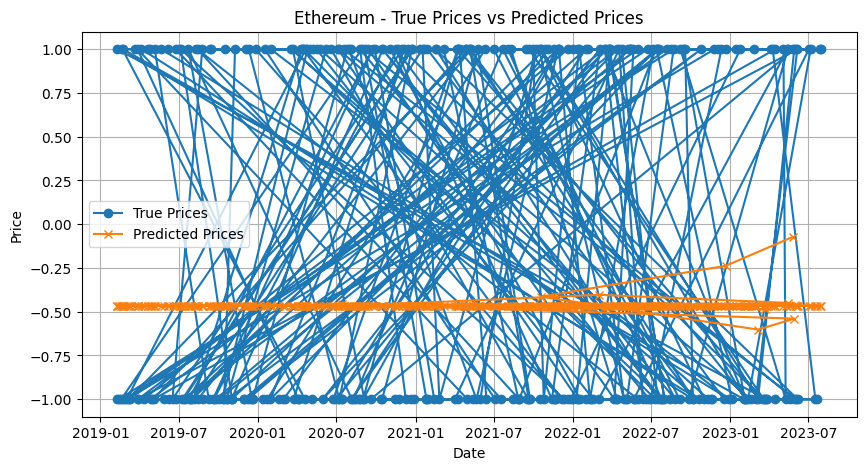

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(y_eth_test.index, y_eth_test.values.astype(float), label="True Prices", marker="o")
plt.plot(y_eth_test.index, y_eth_pred, label="Predicted Prices", marker="x")
plt.title("Ethereum - True Prices vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()